<div style="text-align: center; font-size: 25pt"> Homework 5 </div>

# load package

In [1]:
# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# you may add more if you need

# Skewed data

In [3]:
# load the online user followers data
 user_follower = pd.read_csv("./online_user_followers.csv")
#u = pd.read_csv("./online_user_followers.csv")
print(user_follower.shape)
user_follower.head()

(215464, 4)


,user_name,user_created,user_followers,user_friends
0,MyNewsNE,24-05-2020 10:18,64.0,11.0
1,Shubham Gupta,14-08-2020 16:42,1.0,17.0
2,Journal of Infectiology,14-12-2017 07:07,143.0,566.0
3,Zane,18-09-2019 11:01,29.0,25.0
4,Ann-Maree O’Connor,24-01-2013 14:53,83.0,497.0


<font color='red'>**Question:**</font> The ``user_followers`` and ``user_friends`` have missing values: 

At first, try to remove the missing rows for ``user_followers``,

Then, try to fill the missing values with 0 for ``user_friends``.

In [4]:
d1 = user_follower.dropna(axis=0,subset = ["user_followers"]).copy()
d1["user_friends"].fillna(0, inplace = True)
d1

,user_name,user_created,user_followers,user_friends
0,MyNewsNE,24-05-2020 10:18,64.0,11.0
1,Shubham Gupta,14-08-2020 16:42,1.0,17.0
2,Journal of Infectiology,14-12-2017 07:07,143.0,566.0
3,Zane,18-09-2019 11:01,29.0,25.0
4,Ann-Maree O’Connor,24-01-2013 14:53,83.0,497.0
...,...,...,...,...
215459,Marcela Ulate,2012-05-05 19:32:50,67.0,196
215460,Dr. Alison Obr,2009-01-26 21:43:44,806.0,2360
215461,Hillary Hoffmann,2019-05-07 19:30:49,348.0,588
215462,JudeME,2018-04-19 00:26:25,1439.0,951


<font color='red'>**Question:**</font> Show the min, 25% percentile, median, 75% percentile, max, mean and the stardard deviations of ``user_followers``.

In [5]:
datamin = d1['user_followers'].min()

percentile1 = d1['user_followers'].quantile(0.25)

datamedian = d1['user_followers'].median()

percentile2 = d1['user_followers'].quantile(0.75)

datamax = d1['user_followers'].max()

datamean = d1['user_followers'].mean()

datastd = d1['user_followers'].std()

(datamin, percentile1,  datamedian, percentile2, datamax, datamean, datastd)

(0.0, 121.0, 509.0, 2123.0, 16270203.0, 44859.586354310755, 609132.4231951021)

<font color='red'>**Question:**</font> Make a histogram with linear binning for ``user_followers``, try to choose a proper number of bins.

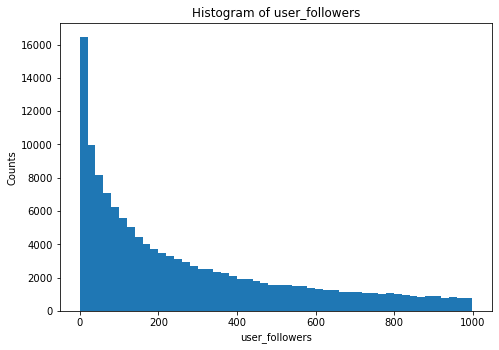

In [6]:
fig = plt.figure(figsize=(6, 4))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

mask = (d1["user_followers"] < 10 **3)

# 得到清理后的数据
d1_cleaned = d1[mask]

axes.hist(d1_cleaned["user_followers"],bins = 50); # The second argument sets the number of bins.
# 利用cleaned将差值大的数值去除
axes.set_xlabel('user_followers')
axes.set_ylabel('Counts')
axes.set_title('Histogram of user_followers');

<font color='red'>**Question:**</font> Make a histogram with logarithmic binning for ``user_followers``. Because the values has lots of zeros, we need to make a translation by adding 1 for each value, i.e., make the histogram for ``user_followers``+1.

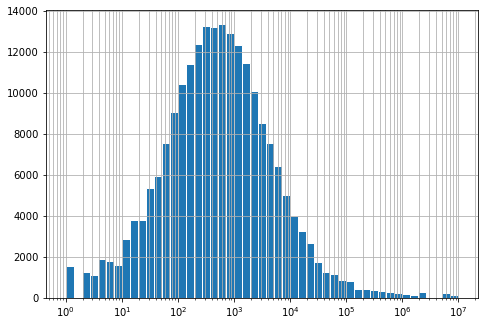

In [7]:
fig = plt.figure(figsize=(6, 4))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.hist(d1["user_followers"]+1,  bins=np.logspace(0, 7, 50), edgecolor="w")
axes.set_xscale('log') 
axes.grid(True,which="both",ls="-") # Shown for teaching

<font color='red'>**Question:**</font> Show the PDF, CDF and CCDF for ``user_followers``+1 using the logarithmic binning.

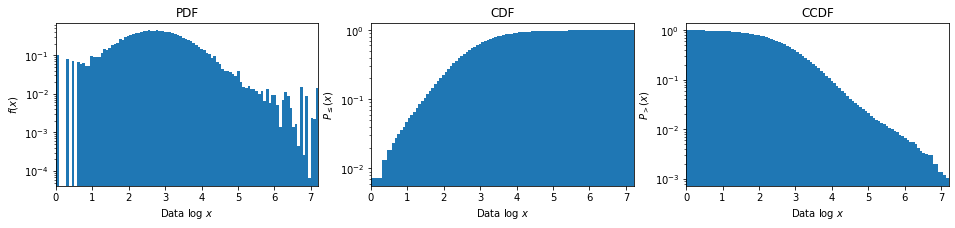

In [8]:
def plot_pdfcdfccdf(x, setylog=False, setxlog=False, n_bins=100):
    """Plots the PDF, CDF, and CCDF for a given data set x, using hist.""" 

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 3))
    xlim = [np.min(x),np.max(x)]
    if setxlog:
        xlogstring = "log "
    else:
        xlogstring = ""

    # Plot the density curve
    ax = axes[0]
    ax.hist(x, n_bins, density=True, cumulative=False, log=setylog)
    ax.set_ylabel('$f(x)$')
    ax.set_xlabel('Data '+ xlogstring +'$x$')
    ax.set_title('PDF')

    # Plot the cumulative density curve
    ax = axes[1]
    ax.hist(x, n_bins, density=True, cumulative=True, log=setylog)
    ax.set_ylabel('$P_{\leq}(x)$')
    ax.set_xlabel('Data '+ xlogstring +'$x$')
    ax.set_title('CDF')

    # Plot the complementary cumulative density curve
    ax = axes[2]
    ax.hist(x, n_bins, density=True, cumulative=-1, log=setylog)
    ax.set_ylabel('$P_{>}(x)$')
    ax.set_xlabel('Data '+ xlogstring +'$x$')
    ax.set_title('CCDF')

    for ax in axes:
        ax.set_xlim(xlim)

        
plot_pdfcdfccdf(np.log10(d1["user_followers"]+1), True, True)

<font color='red'>**Question:**</font> For the ``user_friends`` values, try to convert it to float values.

Hint: the values may contain strings that are not numbers, you need to convert them to ``NAN``, then drop the missing values.

In [9]:
def isnum(j):
    try:
        num = float(i)
        return True
    except ValueError:
        return False
new = []
for i in user_follower["user_friends"]:
    if isnum(i):
        new.append(float(i))
    else:
        new.append(np.nan)
user_follower["user_friends"] = new
ndata = user_follower[user_follower["user_friends"].notnull()]
ndata

,user_name,user_created,user_followers,user_friends
0,MyNewsNE,24-05-2020 10:18,64.0,11.0
1,Shubham Gupta,14-08-2020 16:42,1.0,17.0
2,Journal of Infectiology,14-12-2017 07:07,143.0,566.0
3,Zane,18-09-2019 11:01,29.0,25.0
4,Ann-Maree O’Connor,24-01-2013 14:53,83.0,497.0
...,...,...,...,...
215459,Marcela Ulate,2012-05-05 19:32:50,67.0,196.0
215460,Dr. Alison Obr,2009-01-26 21:43:44,806.0,2360.0
215461,Hillary Hoffmann,2019-05-07 19:30:49,348.0,588.0
215462,JudeME,2018-04-19 00:26:25,1439.0,951.0


<font color='red'>**Question:**</font>  Make a histogram with logarithmic binning for ``user_friends``+1. 

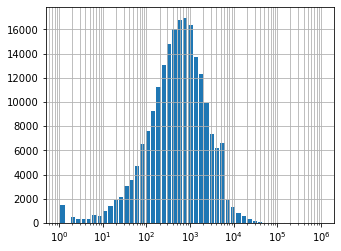

In [11]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.hist(ndata['user_friends']+1, bins = np.logspace(0,6,50), edgecolor = 'w')
axes.set_xscale('log') 
axes.grid( True, which="both",ls="-") # Shown for teaching

# Network data

**Data Description:**

**Character Interaction Networks for the HBO Series "Game of Thrones"**

The network data contains the nodes ``(got-s1-nodes.csv)`` and edges ``(got-s1-edges.csv)`` for the season one series.

Pairs of characters are connected by (undirected) edges weighted by the number of interactions.

There are five interaction types. Character A and Character B are connected whenever:

1. Character A speaks directly after Character B
1. Character A speaks about Character B
1. Character C speaks about Character A and Character B
1. Character A and Character B are mentioned in the same stage direction
1. Character A and Character B appear in a scene together


<font color='red'>**Question:**</font>  Create the ``Adjacency List`` for this network using the edge data: ``got-s1-edges.csv``. 
Print the adjacency list for ``Ned`` and ``Cersei``.

In [22]:
from pprint import pprint
df1 = pd.read_csv("./got-s1-edges.csv")
x1 = df1[["Source","Target"]].values 
adj_list = {}
for node_i, node_j in x1:
    if node_i not in adj_list:
        adj_list[node_i] = set() # 'set' is used to prevent accidental multiple edges
    
    adj_list[node_i].add(node_j)  # 无向图加两次节点元素
    
    # Manually add the opposite direction edge
    if node_j not in adj_list:
        adj_list[node_j] = set()
    
    adj_list[node_j].add(node_i)
    
print(adj_list["NED"])
print(adj_list["CERSEI"])
    


{'RENLY', 'HIGH_SEPTON', 'AERYS', 'DAENERYS', 'BERIC', 'TOMARD', 'MAESTER_LUWIN', 'LYANNA', 'ROBB', 'PYCELLE', 'TYRION', 'RODRIK', 'GENDRY', 'HOUND', 'BRANDON_STARK', 'YOREN', 'MERYN_TRANT', 'BRAN', 'JANOS', 'TOBHO_MOTT', 'CERSEI', 'MOUNTAIN', 'BARRISTAN', 'HUGH_OF_THE_VALE', 'SANSA', 'BENJEN', 'LITTLEFINGER', 'LORAS', 'JEOR', 'WILL', 'STANNIS', 'RICKARD_STARK', 'GREATJON_UMBER', 'LANCEL', 'STEFFON', 'MHAEGEN', 'PYP', 'SEPTA_MORDANE', 'VARLY', 'ROOSE_BOLTON', 'JAIME', 'ARYA', 'TYWIN', 'ILYN_PAYNE', 'THEON', 'CATELYN', 'JON', 'ROS', 'MYCAH', 'BAELOR', 'JORAH', 'JORY_CASSEL', 'JOFFREY', 'VARYS', 'SYRIO_FOREL', 'ROBERT', 'JON_ARRYN'}
{'RENLY', 'LYANNA', 'ROBB', 'PYCELLE', 'TYRION', 'HOUND', 'YOREN', 'MERYN_TRANT', 'BRAN', 'BARRISTAN', 'SANSA', 'BENJEN', 'LITTLEFINGER', 'JEOR', 'STANNIS', 'NED', 'ILYN_PAYNE', 'JAIME', 'ARYA', 'TYWIN', 'CATELYN', 'JON', 'ROS', 'BAELOR', 'JOFFREY', 'VARYS', 'LANCEL', 'ROBERT', 'JON_ARRYN'}


<font color='red'>**Question:**</font> For each character (node) $i$, calculate the number of nodes connected to it, denote as $k_i$. Then make a histgram of the distribution of $k_i$ for all nodes.

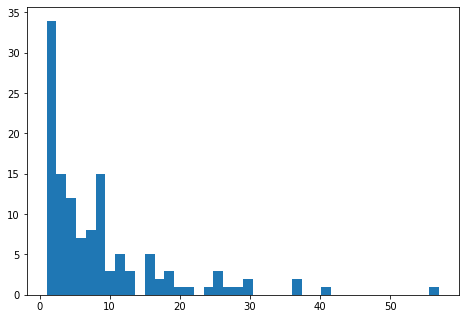

In [24]:
a = df1.iloc[:,0:2].values
adj_list1 = {}
for node_i, node_j in a:
    if node_i not in adj_list1:
        adj_list1[node_i] = set() # 'set' is used to prevent accidental multiple edges
    
    adj_list1[node_i].add(node_j)  # 无向图加两次节点元素
    
    # Manually add the opposite direction edge
    if node_j not in adj_list1:
        adj_list1[node_j] = set()
    
    adj_list1[node_j].add(node_i)

list1 = [len(adj_list1.get(element)) for element in adj_list1]
list2 = adj_list1.keys()
d = dict(zip(list2, list1))
df = pd.DataFrame(pd.Series(d), columns=['count'])
df = df.reset_index().rename(columns={'index':'nodes'})

fig = plt.figure(figsize=(6, 4))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.hist(df["count"].values,bins = 40); # The second argument sets the number of bins.


# The End